# Problem 1:

Suppose that $X$ is a continous random variable with probability density function given by 
$f(x)= x^2+2x/3+1/3$ for $0\le x \le c$ and $f(x)=0$ otherwise. 

(a) What must be the value of $c$? 
- To be a valid PDF, $(\int_{0}^{c} x^2+2x/3+1/3 dx = c^3/3 + c^2/3+c/3) =1$
- Thus $\int_{0}^{c} f(x) dx = 1/3+ 1/3 + 1/3 = 1$ where $c = 1$ is a valid solution!

(b) Assuming the value of $c$ from (a), compute and plot $F(x)$. 


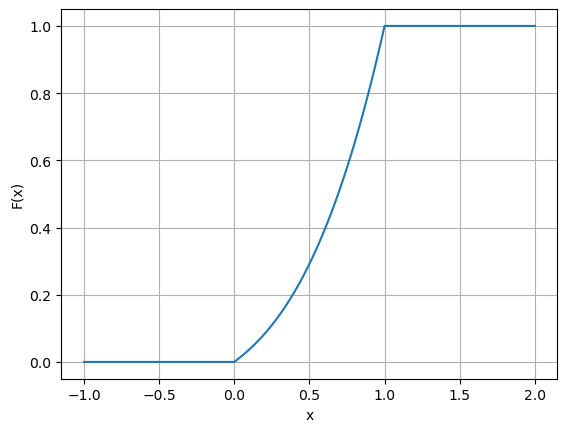

In [537]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-1, 2, 1000)
integ = lambda x: x**3/3 + x**2/3 + x/3 

def F(x):
    F_vals = np.zeros(len(x))

    #Find indices of x_vals where 0 <= x <= 1
    in_range = [i for i, xi in enumerate(x) if (xi >= 0 and xi <= c)]

    #CDF is a piecewise function
    F_vals[x < 0] = 0
    F_vals[in_range] = integ(x_vals[in_range])
    F_vals[x > 1] = 1
    
    return F_vals

y_vals = F(x_vals)

plt.plot(x_vals, y_vals)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid(True)

(c) Assuming the value of $c$ from (a), compute $Prob(1/3\le X \le 2/3)$, $E(X)$, and $Var(X)$.


In [561]:
#Redefine this for a single value input
def F(x): 
    if x < 0:                 F_val = 0
    elif x>= 0 and x<= 1:     F_val = (x**3 + x**2 + x)/3
    else:                     F_val = 1
    
    return F_val


#Prob(1/3 ≤ X ≤ 2/3) = F(2/3) - F(1/3)
prob = F(2/3) - F(1/3) #F(2/3) - F(1/3)
print(f'Prob(1/3 ≤ X ≤ 2/3) = {prob:.5f}')

#E(X)
expect = lambda x: 1/4 * x**4 + 2/9 * x**3 + 1/6 * x**2 #integal of xf(x) 
E_x = expect(1) - expect (0) #E(1) - E(0)
print(f'E(X) = {E_x:.5f}')

#Var(X)
expect2 = lambda x: (1/5)*x**5 + (1/6)*x**4 + (1/9)*x**3

E_X = expect(1) - expect(0)
E_X2 = expect2(1) - expect2(0)
Var_X = E_X2 - E_X**2

print(f'Var(X) = {Var_X:.5f}')

Prob(1/3 ≤ X ≤ 2/3) = 0.30864
E(X) = 0.63889
Var(X) = 0.06960


# Problem 2

An airport has one queue to check-in for the Terminal $1$ passengers and one queue to check-in for the Terminal $2$ passengers. After the
check-in, passengers enter a queue for the Security-Check
as shown in the following figure. 


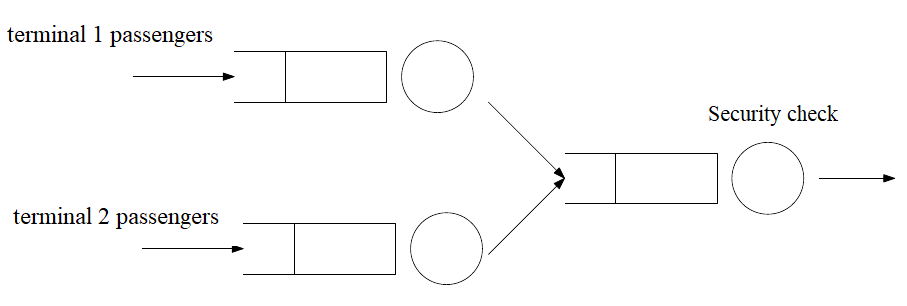

The arrivals are Poisson arrivals with rates $\lambda_1$ and $\lambda_2$ for Terminal $1$ and $2$ passengers, respectively. The service times are exponentially distributed with service rates $\mu_1$ and $\mu_2$ for terminal $1$ check-in and terminal $2$ check-in, respectively. The service times are exponentially distributed with service rates $\mu_S$ for the security-check. 


Answer the following questions with mathematical analysis:


(1) What is the average total time that passengers (including those from both Terminal 1 and Terminal 2) spend in the system? The total time in the system is defined as the duration from when a passenger enters a terminal to when they complete the security check.  

$W_1 = \frac{1}{\mu_1-\lambda_1}$<br>
$W_2 = \frac{1}{\mu_2-\lambda_2}$<br>
$W_s = \frac{1}{\mu_s-(\lambda_1+\lambda_2)}$<br><br>
$W_T = \frac{\lambda_1(W_1+W_s)+\lambda_2(W_2+W_s)}{\lambda_1+\lambda_2} = \frac{\lambda_1W_1+\lambda_2W_2}{\lambda_1+\lambda_2} +W_s$

(2) What is the average total time spent in the system by Terminal $1$ passengers? What is the average total time spent in the system by Terminal $2$ passengers?

$W^{T1}_{tot} = W_1 + W_s = \frac{1}{\mu_1-\lambda_1} + \frac{1}{\mu_s-(\lambda_1+\lambda_2)}$<br>
$W^{T2}_{tot} = W_2 + W_s = \frac{1}{\mu_2-\lambda_2} + \frac{1}{\mu_s-(\lambda_1+\lambda_2)}$


(3) What is the average total number of Terminal $1$ passengers in the system? What is the average total number of Terminal $2$ passengers in the system?

Little's Law: $L=\lambda W$<br>
$L_1 = \lambda_1W^{T1}_{tot} = \frac{\lambda_1}{\mu_1-\lambda_1} + \frac{\lambda_1}{\mu_s-(\lambda_1+\lambda_2)}$<br>
$L_2 = \lambda_2W^{T2}_{tot} = \frac{\lambda_2}{\mu_2-\lambda_2} + \frac{\lambda_2}{\mu_s-(\lambda_1+\lambda_2)}$


(4) Will your answers to the above three questions change if arrivals to terminals are non-Poisson arrivals?

Yes, these answers will change if the terminals are non-Poisson arrivals. The provided formulas assume a M/M/1 queue system, meaning they are only valid for Poisson processes. In particular, Poisson processes and these derived equations assume the memoryless property, which is only characteristic of exponential and geometric distributions and thus wouldn't be valid for other kinds of arrivals.


# End of Problem 2


# Problem 3

Understand the following sample python code for a simple single queue system. Modify the code to simulate the network of queues in Problem 2, using the following parameters: 

The average arrival rates are $20$ customers/hour for Terminal $1$ passengers and $30$ customers/hour for Terminal $2$ passengers. The average service times at the Terminal $1$ check-in is $2$ minutes per customer. The average service times at the Terminal $2$ check-in is $1.5$ minutes per customer. The security-check maintains a server utilization of $75\%$ over the time (please figure out the service rate by yourself).

Your program should produce the following statistical results:


(1) The average total time that passengers (including those from both Terminal 1 and Terminal 2) spend in the system.


(2) The average total time spent in the system by Terminal $1$ passengers. 


(3) The average total time spent in the system by Terminal $2$ passengers.


(4) The average total number of Terminal $1$ passengers in the system.


(5) The average total number of Terminal $2$ passengers in the system.




Your extended code should be written below: 

In [1]:
import numpy as np
np.random.seed(5)

class Simulation:
    '''Define a class called Simulation'''

    def __init__(self, num_delays_required):

        #Simple queue input parameters
        self.T1_interarrival = 60/20 # 60min / λ1
        self.T1_service_time = 2  
        self.T2_interarrival = 60/30 # 60min / λ2
        self.T2_service_time = 1.5 
        self.Ts_interarrival = 60/(20+30) # 60min / (λ1 + λ2)
        self.Ts_service_time = 60/((20+30)/0.75) 
        
        #Initialize simulation clock.
        self.sim_time = 0.0

        #Create the queues
        self.T1 = SimpleQueue(self.T1_interarrival, self.T1_service_time, False)
        self.T2 = SimpleQueue(self.T2_interarrival, self.T2_service_time, False)
        self.Ts = SimpleQueue(self.Ts_interarrival, self.Ts_service_time, True)

        #Initialize averages
        self.avg_T1_in_system = 0.0
        self.avg_T2_in_system = 0.0

        #Initialize other variables.
        self.num_delays_required = num_delays_required
        self.next_event_type = 0.0
        self.time_last_event = 0.0

    def main(self):
        Ts_arrival_origin = 1
        
        #Run the simulation while more delays are needed.
        while (self.T1.num_custs_delayed + self.T2.num_custs_delayed) < self.num_delays_required:
            self.timing()
            
            origin = 0 #For Ts, which terminal arrival coming from

            if self.next_event_type == 0:
                self.T1.arrive(self.sim_time, -1)
            
            elif self.next_event_type == 1:
                self.T1.depart(self.sim_time)
                self.Ts.arrive(self.sim_time, 1)
            
            elif self.next_event_type == 2:
                self.T2.arrive(self.sim_time, -1)
            
            elif self.next_event_type == 3:
                self.T2.depart(self.sim_time)
                self.Ts.arrive(self.sim_time, 2)
            
            elif self.next_event_type == 5:   
                self.Ts.depart(self.sim_time)   

            self.update_time_avg_stats()
                
        #Invoke the report generator.
        self.report()

    def timing(self):
        next_events = [self.T1.time_next_event[1], self.T1.time_next_event[2],
                       self.T2.time_next_event[1], self.T2.time_next_event[2],
                       self.Ts.time_next_event[1], self.Ts.time_next_event[2]]

        min_time_next_event = min(next_events)
        self.next_event_type = next_events.index(min_time_next_event)
        self.sim_time = min_time_next_event

    def update_time_avg_stats(self):
        """Function to compute time-average statistics."""

        time_since_last = self.sim_time - self.time_last_event
        self.time_last_event = self.sim_time

        #Update average time in the system for customers from each terminal
        T1_in_system = self.T1.num_in_sys + self.Ts.num_in_sys_T1
        T2_in_system = self.T2.num_in_sys + self.Ts.num_in_sys_T2

        self.avg_T1_in_system += T1_in_system * time_since_last
        self.avg_T2_in_system += T2_in_system * time_since_last

    def report(self):
        total_customers = self.T1.num_custs_delayed + self.T2.num_custs_delayed
        total_time = (self.T1.total_time_in_system + self.T2.total_time_in_system +
                      self.Ts.total_time_in_system_T1 + self.Ts.total_time_in_system_T2)
        
        print(f"Average time in system: {total_time/total_customers:.3f} minutes")
        print(f"Average time in system by Terminal 1 passengers: {(self.T1.total_time_in_system + self.Ts.total_time_in_system_T1)/self.T1.num_custs_delayed:.3f} minutes")
        print(f"Average time in system by Terminal 2 passengers: {(self.T2.total_time_in_system + self.Ts.total_time_in_system_T2)/self.T2.num_custs_delayed:.3f} minutes")
        print(f"Average number of Terminal 1 passengers in system: {self.avg_T1_in_system/self.sim_time:.3f}")
        print(f"Average number of Terminal 2 passengers in system: {self.avg_T2_in_system/self.sim_time:.3f}")
        print(f"Time simulation ended: {self.sim_time:.3f} minutes")
        
class SimpleQueue:
    """Define a class called SimpleQueue"""

    def __init__(self, mean_interarrival, mean_service, is_Ts):
        """Initialization function"""

        #Specify input parameters
        self.mean_interarrival = mean_interarrival
        self.mean_service = mean_service

        #Initialize state variables
        self.server_status = 0  # 0 is idle and 1 is busy.
        self.num_in_q = 0
        self.time_arrival = []  # List for times of arrival of customers.

        #Initialize statistical counters
        self.num_custs_delayed = 0.0
        self.total_time_in_system = 0.0

        #Initialize event list
        self.time_next_event = [0, 0, 0]   #Takes form: [<not used>, next arrival, next departure]
        self.time_next_event[1] = self.expon(self.mean_interarrival)
        self.time_next_event[2] = float('inf')

        #Initialize other variables.
        self.num_events = 2
        self.is_Ts = is_Ts

        #Initialize other variables specific to terminal type
        if is_Ts == True: 
            self.origin_in_system = [] #1 is from T1, 2 is from T2. Index 0 is customer being served
            self.time_next_event[1] = float('inf')

            #Initialize separate variables tracking customers from the different terminals
            self.num_in_sys_T1 = 0.0
            self.num_in_sys_T2 = 0.0
            self.time_last_event_T1 = 0.0
            self.time_last_event_T2 = 0.0
            self.total_time_in_system_T1 = 0.0
            self.total_time_in_system_T2 = 0.0
        else:
            self.time_last_event = 0.0
            self.num_in_sys = 0.0
            self.avg_in_system = 0.0

    def arrive(self, sim_time, origin):
        """Arrive event function."""

        #Schedule next arrival if not Ts
        if self.is_Ts == False: 
            self.num_in_sys += 1
            self.time_next_event[1] = sim_time + self.expon(self.mean_interarrival)
        else:
            if origin == 1:
                self.origin_in_system.append(1)
                self.num_in_sys_T1 += 1
            else:
                self.origin_in_system.append(2)
                self.num_in_sys_T2 += 1
                
        #Check to see whether the server is busy.
        if self.server_status == 1:
            #Server is busy, so increment the number of customers in queue and store the
            #time of arrival of the arriving customer at the end of the list self.time_arrival.
            self.num_in_q += 1
            self.time_arrival.append((sim_time, origin))
        else:
            #Increment the number of customers delayed and make server busy.
            self.num_custs_delayed += 1
            self.server_status = 1

            #Schedule a departure and update time in system
            service_time = self.expon(self.mean_service)
            self.time_next_event[2] = sim_time + service_time
            if self.is_Ts == False:
                self.total_time_in_system += service_time
            else:
                if origin == 1:
                    self.total_time_in_system_T1 += service_time
                else:
                    self.total_time_in_system_T2 += service_time

    def depart(self, sim_time):
        """Depart event function."""
        
        if self.is_Ts == False: 
            self.num_in_sys -= 1
        else:
            if len(self.origin_in_system) > 0:
                origin = self.origin_in_system.pop(0)
                if origin == 1:
                    self.num_in_sys_T1 -= 1
                else:
                    self.num_in_sys_T2 -= 1

        #Check to see whether the queue is empty.
        if self.num_in_q == 0:
            #The queue is empty, so make the server idle and
            #eliminate the departure event from consideration.
            self.server_status = 0
            self.time_next_event[2] = float('inf')
        else:
            #The queue is nonempty, so decrement the number in queue.
            self.num_in_q -= 1
            arrival_time, origin = self.time_arrival.pop(0)
            delay = sim_time - arrival_time
            service_time = self.expon(self.mean_service)
            self.time_next_event[2] = sim_time + service_time
            self.num_custs_delayed += 1

            #Update the correct time in the system counter
            if self.is_Ts == False:
                self.total_time_in_system += delay + service_time
            else:
                if origin == 1:
                    self.total_time_in_system_T1 += delay + service_time
                else:
                    self.total_time_in_system_T2 += delay + service_time

    def expon(self, mean):
        """Function to generate exponential random variates."""

        return -mean * np.log(np.random.uniform(0, 1))

# Create an instance of class MM1_Queue.
#m = Simulation(50)
m = Simulation(100000)

# Call main function to start the simulation.
m.main()

Average time in system: 9.427 minutes
Average time in system by Terminal 1 passengers: 9.340 minutes
Average time in system by Terminal 2 passengers: 9.484 minutes
Average number of Terminal 1 passengers in system: 3.122
Average number of Terminal 2 passengers in system: 4.791
Time simulation ended: 119986.607 minutes


In [569]:
'''THEORETICAL CALCULATIONS'''
lam1 = 20/60 
lam2 = 30/60

#Service rates 
mu1 = 1/2
mu2 = 1/1.5
mus = (lam1 + lam2)/0.75

#Individual times
W1 = 1/(mu1 - lam1)
W2 = 1/(mu2 - lam2)
Ws = 1/(mus - (lam1+lam2))

#Total times
W1T = W1 + Ws
W2T = W2 + Ws
WT = (lam1*W1T + lam2*W2T)/(lam1+lam2)

#Average numbers in system 
L1 = lam1 * W1T
L2 = lam2 * W2T

print("THEORETICAL CALCULATIONS")
print(f"Total time in sytem (all passengers):       {WT:.3f} min")
print(f"Total time in sytem (T1 passengers):        {W1T:.3f} min")
print(f"Total time in sytem (T2 passengers):        {W2T:.3f} min")
print(f"Total number of T1 passengers in system:    {L1:.3f}")
print(f"Total number of T2 passengers in system:    {L2:.3f}\n")

THEORETICAL CALCULATIONS
Total time in sytem (all passengers):       9.600 min
Total time in sytem (T1 passengers):        9.600 min
Total time in sytem (T2 passengers):        9.600 min
Total number of T1 passengers in system:    3.200
Total number of T2 passengers in system:    4.800



(a) Simulate $50$ customers in total. Compare the theoretical results calculated in Problem 2 and the simulation results obtained in Problem 3. Use a table to show the comparison results.


Ans: 


|  Metric                                            | Simulation result        | Analytical Result    | 
|:---------------------------------------------------| :----------------------: | :-------------------:| 
|  avg. total time in the system (all passengers)    |       5.687  min         |        9.600 min     |
|  avg. total time in the system (T1 passengers)     |       4.147 min          |        9.600 min     |
|  avg. total time in the system (T2 passengers)     |       6.714 min          |        9.600 min     |
|  avg. total number of T1 passengers in the system  |       1.321              |         3.2          |
|  avg. total number of T2 passengers in the system  |       3.141              |          4.8         |
  



(b) Increasing the total number of simulated customers to $100,000$. Run your simulation five times, each run with a different random seed. Record the simulation result of each run and take the average over the five runs as the final simulation result. 

Ans: 


|  Metric                                            |Run 1        | Run 2       | Run 3      | Run 4      | Run 5      | Final Result | 
|:---------------------------------------------------|:-------:    | :----:      | :---:      |:----:      | :--:       |:----:        |
|  random seed                                       |    1        |   2         |   3        |  4         |   5        |       -      |
|  avg. total time in the system (all passengers)    |  9.709 min  |  9.602 min  | 9.883 min  |  9.646 min |  9.427 min |   9.653 min  |
|  avg. total time in the system (T1 passengers)     |  9.625 min  |  9.534 min  | 10.051 min |  9.642 min |  9.340 min |   9.640 min  |
|  avg. total time in the system (T2 passengers)     |  9.765 min  |  9.647 min  | 9.772 min  |  9.649 min |  9.484 min |   9.663 min  |
|  avg. total number of T1 passengers in the system  |  3.209      |  3.197      | 3.385      |  3.210     |  3.122     |   3.225 min  |
|  avg. total number of T2 passengers in the system  |  4.927      |  4.857      | 4.964      |  4.853     |  4.791     |   4.878 min  |



# End of Problem 3


# Problem 4 (15%)

 
Write a simulation to validate the PASTA (Poisson Arrivals See Time Averages) property, based on Example 3.21 of the Lecture Notes. Specifically, your simulation should perform the following steps:

Step 1: Generate a sequence of $n$ Poisson arrivals over the interval $(0, \sum_{i=1}^n t_i)$, where $t_i$ is the interarrival times between $(i-1)$th and $i$th arrivals.

Step 2: Repeat the following procedure $m$ times:

2.1 Uniformly select a random time instant within the interval $(0, \sum_{i=1}^n t_i)$

2.2 For each selected time, compute the remaining time (i.e., the waiting time) until the next arrival.

Step 3: Compute the average of the $m$ waiting times obtained from Step 2.


Test your simulation with $n=100,000$ and $m= 10,000$. 

Compare this average to the theoretical value of the average residual life in a Poisson process to assess the validity of the PASTA property. 


In [3]:
import numpy as np
np.random.seed(6)

interarrival = 10 #in min

def pasta_simulation(m, n):
    #Step 1
    U = np.random.uniform(0, 1, n)
    exp_intervals = -interarrival * np.log(U) #exponential time between (i-1)th and ith cars
    arrivals = np.cumsum(exp_intervals) #actual time of car arrivals
    total_time = arrivals[-1]

    waiting_times_sum = 0.0

    #Step 2
    for i in range(m):
        t_h = np.random.uniform(0, total_time) #pick random time for hitchhiker arrival
        next_arrival = arrivals[arrivals > t_h][0] #next arrival of all arrivals occuring after hitchiker appears
        waiting_times_sum += (next_arrival - t_h) 

    average_wait = waiting_times_sum/m
    print(f'Average waiting time for {m} hitchhiker arrivals: {average_wait:.3f} minutes')

pasta_simulation(100000, 10000)

Average waiting time for 100000 hitchhiker arrivals: 9.972 minutes


The theoretical value of the average residual life in a Poisson proces is given by $\frac{1}{\lambda} = \frac{1}{10} = 10$ minutes. This simulation produced a result of $9.972$ minutes with a random seed of 6, which is fairly accurate to the expected value.

# End of Problem 4

# Problem 5 (15%)

Let $W$ and $W_Q$ denote the total waiting time of a packet in the system and the queueing time of the packet, respectively. 

1. Is $W$ the same in an M/M/1 queue with arrival rate λ and service rate 2µ as in an M/M/2 queue with the same arrival rate and two servers, each with service rate µ? Prove your claim. 

For a M/M/1 queue $W_1 = \frac{1}{2\mu-\lambda}$<br>
For a M/M/2 queue:<br>
$P_0 = (1 + \frac{2\lambda^2}{\mu(2\mu-\lambda)} + \frac{\lambda}{\mu})^{-1} = \frac{\mu(2\mu-\lambda)}{\lambda^2+\lambda\mu +2\mu^2}$<br>
$P_{wait} = \frac{1}{2}(\frac{\lambda}{\mu})^2 \cdot \frac{2\mu}{2\mu-\lambda}\cdot P_0 = (\frac{\lambda^2}{\mu(2\mu-\lambda)})(\frac{\mu(2\mu-\lambda)}{\lambda^2+\lambda\mu +2\mu^2}) = \frac{\lambda^2}{\lambda^2+\lambda\mu+2\mu^2}$<br>
$L_q = (\frac{\lambda}{2\mu-\lambda})P_{wait} = (\frac{\lambda}{2\mu-\lambda})(\frac{\lambda^2}{\lambda^2+\lambda\mu+2\mu^2}) = \frac{\lambda^3}{(\lambda^2+\lambda\mu+2\mu^2)(2\mu-\lambda)}$<br>
$L = L_q +\frac{\lambda}{\mu} = \frac{\lambda^3}{(\lambda^2+\lambda\mu+2\mu^2)(2\mu-\lambda)}+\frac{\lambda}{\mu}$<br>
$W_2 = \frac{L}{\lambda} = \frac{\lambda^2}{(\lambda^2+\lambda\mu+2\mu^2)(2\mu-\lambda)}+\frac{1}{\mu}$<br><br>
Since $W_1 \neq W_2$, they are not the same.


2. Is $W_Q$ the same in an M/M/1 queue with arrival rate λ and service at rate 2µ as in an M/M/2 model with the same arrival λ and two servers, each with service rate µ? Prove your claim.

For a M/M/1 queue $W_{q1} = \frac{\lambda}{2\mu(2\mu-\lambda)} = \frac{\lambda}{4\mu-2\lambda\mu}$<br>
For a M/M/2 queue:<br>
$P_0 = (1 + \frac{2\lambda^2}{\mu(2\mu-\lambda)} + \frac{\lambda}{\mu})^{-1} = \frac{\mu(2\mu-\lambda)}{\lambda^2+\lambda\mu +2\mu^2}$<br>
$P_{wait} = \frac{1}{2}(\frac{\lambda}{\mu})^2 \cdot \frac{2\mu}{2\mu-\lambda}\cdot P_0 = (\frac{\lambda^2}{\mu(2\mu-\lambda)})(\frac{\mu(2\mu-\lambda)}{\lambda^2+\lambda\mu +2\mu^2}) = \frac{\lambda^2}{\lambda^2+\lambda\mu+2\mu^2}$<br>
$L_q = (\frac{\lambda}{2\mu-\lambda})P_{wait} = (\frac{\lambda}{2\mu-\lambda})(\frac{\lambda^2}{\lambda^2+\lambda\mu+2\mu^2}) = \frac{\lambda^3}{(\lambda^2+\lambda\mu+2\mu^2)(2\mu-\lambda)}$<br>
$W_{q2} = \frac{L_q}{\lambda} = \frac{\lambda^2}{(\lambda^2+\lambda\mu+2\mu^2)(2\mu-\lambda)}$<br><br>

Since $W_{q1} \neq W_{q2}$, they are not the same.


In [494]:
#Problem 5.1 numerical example

import math

f = lambda x: math.factorial(x)

W = lambda lam, mu, c: L(lam, mu, c)/lam
Wq = lambda lam, mu, c: Lq(lam, mu, c)/lam
L = lambda lam, mu, c: Lq(lam, mu, c) + lam/mu
Lq = lambda lam, mu, c: P(lam, mu, c)/(1-P(lam, mu, c)) * Pwait(lam, mu, c)
P = lambda lam, mu, c: lam/(c*mu)
Pwait = lambda lam, mu, c: (1/f(c)) * (lam/mu)**c * (c*mu/(c*mu-lam)) * Po(lam, mu, c)

def Po(lam, mu, c):
    sum_val = 0
    for n in range(0, c):
        sum_val += ((1/f(n)) * (lam/mu)**n + 1/f(c) * (lam/mu)**c * (c*mu/(c*mu - lam)))   
    return sum_val**(-1)

#Example values
lam = 2
mu = 3

print("==== PART 1 ====")
print(f'W1 = {W(lam, 2*mu, 1)}')
print(f'W2 = {W(lam, mu, 2)}')
print("W1 ≠ W2\n")

print("==== PART 2 ====")
print(f'WQ1 = {Wq(lam, 2*mu, 1)}')
print(f'WQ2 = {Wq(lam, mu, 2)}')
print("WQ1 ≠ WQ2")

==== PART 1 ====
W1 = 0.24999999999999997
W2 = 0.369047619047619
W1 ≠ W2

==== PART 2 ====
WQ1 = 0.08333333333333331
WQ2 = 0.035714285714285705
WQ1 ≠ WQ2


# End of Problem 5